In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
df = pd.read_csv("advertising.csv")
print("First 5 rows:\n", df.head())
print("\nInfo:\n")
print(df.info())
print("\nNull values:\n", df.isnull().sum())

First 5 rows:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Null values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


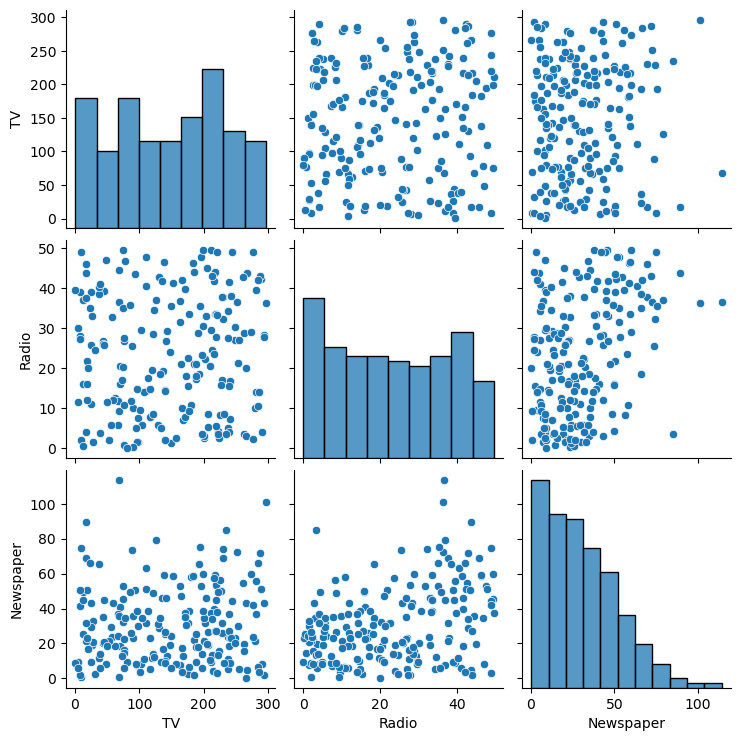

In [5]:
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'

X = df[features]
y = df[target]
sns.pairplot(df[features])
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [15]:
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [19]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)


In [21]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

lin_scores = evaluate(y_test, y_pred_lin)
poly_scores = evaluate(y_test, y_pred_poly)
svr_scores = evaluate(y_test, y_pred_svr)

print("\nLinear Regression: MAE, MSE, RMSE = ", lin_scores)
print("Polynomial Regression: MAE, MSE, RMSE = ", poly_scores)
print("SVR: MAE, MSE, RMSE = ", svr_scores)


Linear Regression: MAE, MSE, RMSE =  (1.274826210954934, 2.9077569102710905, 1.7052146229349228)
Polynomial Regression: MAE, MSE, RMSE =  (0.9033713382791972, 1.442542636901291, 1.2010589647895273)
SVR: MAE, MSE, RMSE =  (1.483622388158763, 3.499087197255254, 1.8705847206836834)


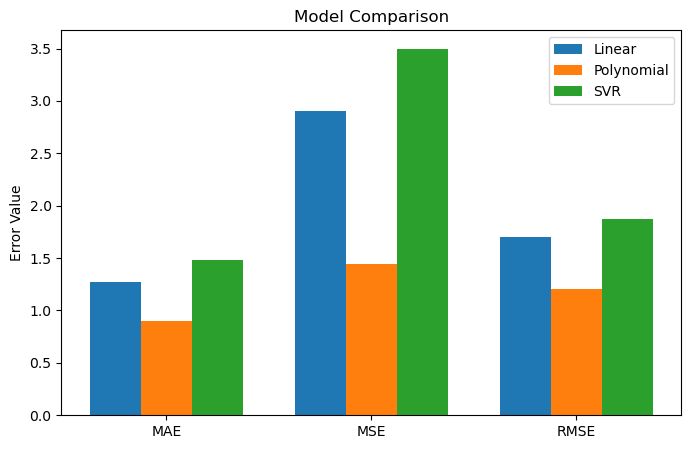

In [23]:
metrics = ['MAE', 'MSE', 'RMSE']
lin_vals = lin_scores
poly_vals = poly_scores
svr_vals = svr_scores

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width, lin_vals, width, label='Linear')
ax.bar(x, poly_vals, width, label='Polynomial')
ax.bar(x + width, svr_vals, width, label='SVR')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Error Value')
ax.set_title('Model Comparison')
ax.legend()
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("\nCluster counts:\n", df['Cluster'].value_counts())



Cluster counts:
 Cluster
2    77
1    65
0    58
Name: count, dtype: int64


C:\Users\Angelin mary\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


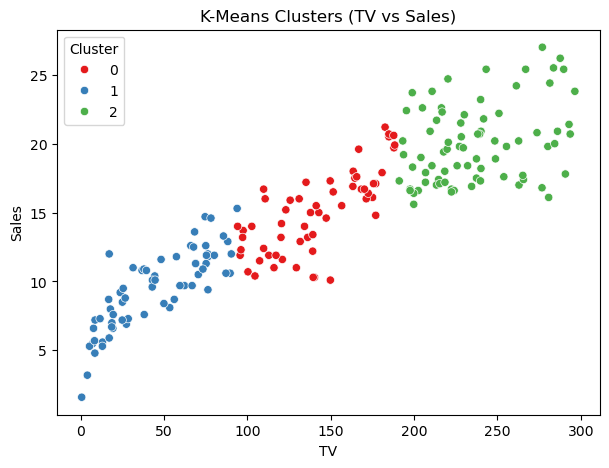

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='TV', y='Sales', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clusters (TV vs Sales)')
plt.show()